**The Office**
* episode_number: Canonical episode number.
* season: Season in which the episode appeared.
* episode_title: Title of the episode.
* description: Description of the episode.
* ratings: Average IMDB rating.
* votes: Number of votes.
* viewership_mil: Number of US viewers in millions.
* duration: Duration in number of minutes.
* release_date: Airdate.
* guest_stars: Guest stars in the episode (if any).
* director: Director of the episode.
* writers: Writers of the episode.
* has_guests: True/False column for whether the episode contained guest stars.
* scaled_ratings: The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('')
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [4]:
color = []
size = []

for i in df['scaled_ratings']:
  if i < 0.25:
    color.append('red')
  elif i < 0.50:
    color.append('orange')
  elif i < 0.75:
    color.append('lightgreen')
  else:
    color.append('darkgreen')
    
for i in df['has_guests']:
  if i == True:
    size.append(250)
  else:
    size.append(25)

In [5]:
df['colors'] = color
df['sizes'] = size

In [6]:
df0 = df[df['has_guests'] == False]
df1 = df[df['has_guests'] == True]

In [7]:
df1.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,2005-04-26,Amy Adams,Amy Heckerling,Mindy Kaling,True,0.34375,orange,250
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,2005-10-04,Nancy Carell,Paul Feig,Michael Schur,True,0.56250,lightgreen,250
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,2005-10-11,Amy Adams,Ken Kwapis,B. J. Novak,True,0.56250,lightgreen,250
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,2005-11-08,Tim Meadows,Greg Daniels,Paul Lieberstein,True,0.62500,lightgreen,250
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,2005-11-22,Ken Jeong,Paul Feig,Jennifer Celotta,True,0.56250,lightgreen,250


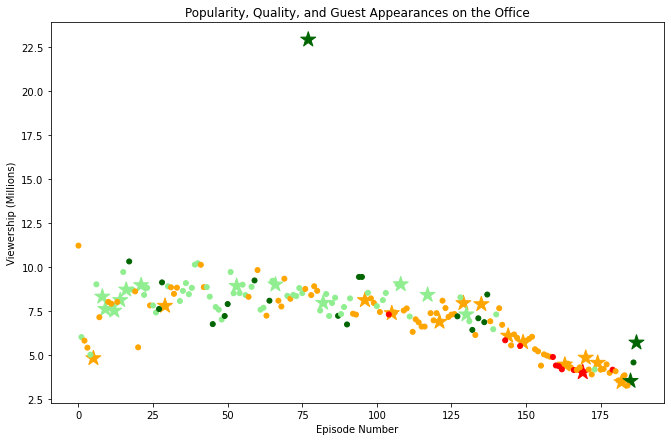

In [8]:
plt.rcParams['figure.figsize'] = [11, 7]
fig = plt.figure()

plt.scatter(df1.episode_number, df1.viewership_mil, c=df1.colors, s=df1.sizes, marker='*')
plt.scatter(df0.episode_number, df0.viewership_mil, c=df0.colors, s=df0.sizes)

plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')

plt.show()